In [1]:
#import nessasory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("house_prices.csv")

In [3]:
data.head()

,sqft,bedrooms,age,price
0,1660,2,33,90553
1,2094,2,40,128912
2,1930,4,39,137435
3,1895,5,18,153178
4,2438,3,40,138611


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sqft      100 non-null    int64
 1   bedrooms  100 non-null    int64
 2   age       100 non-null    int64
 3   price     100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


In [6]:
corelation=data.corr()

<Axes: >

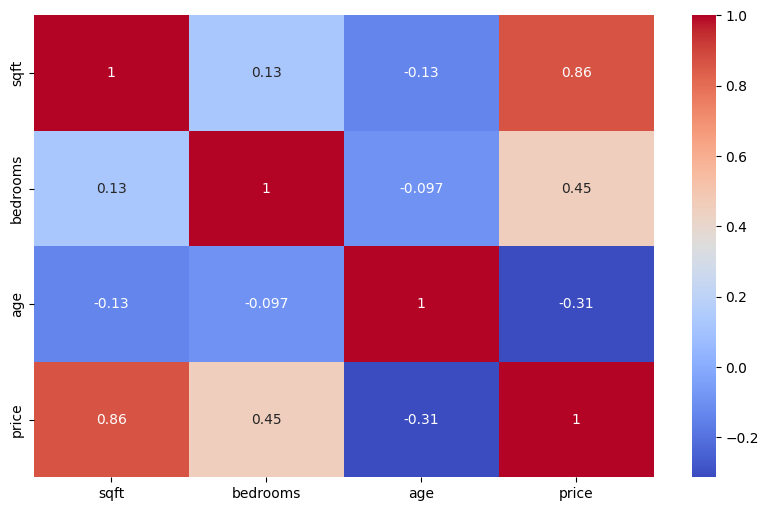

In [8]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(corelation,annot=True,cmap='coolwarm')

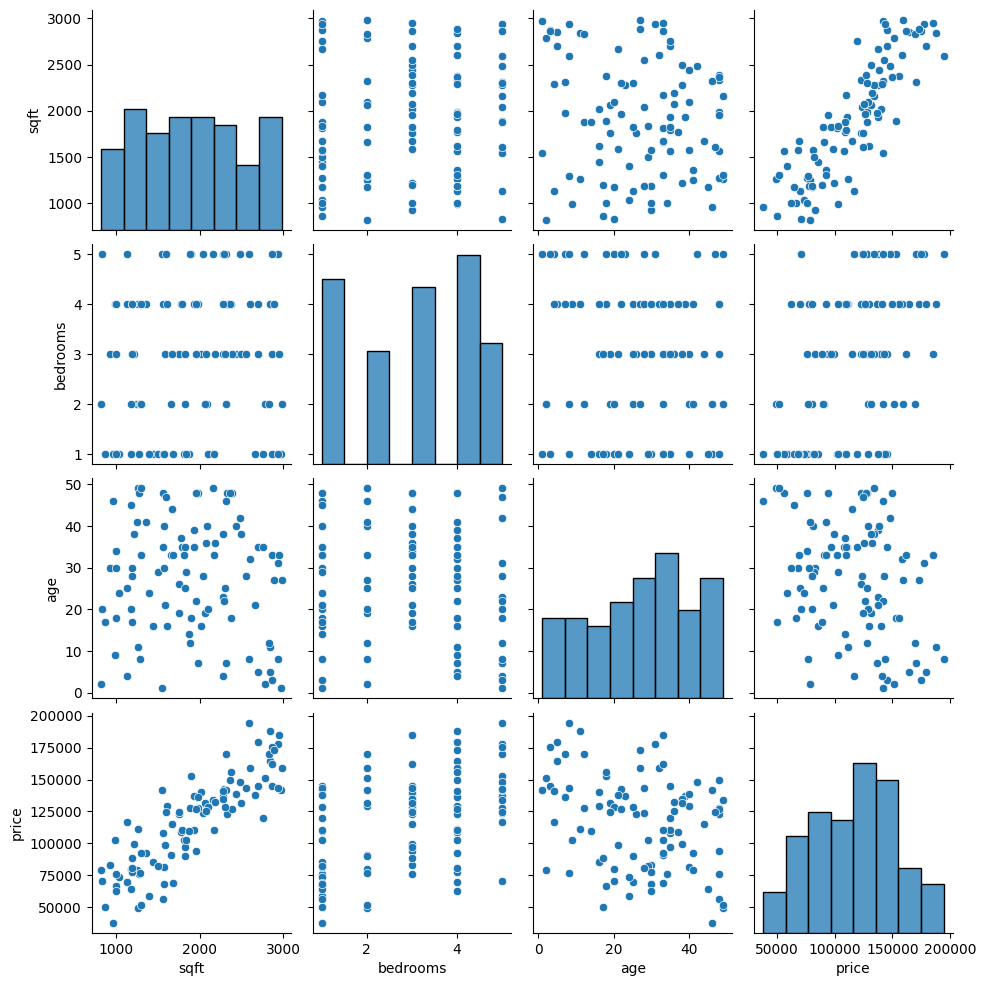

In [9]:
sns.pairplot(data)

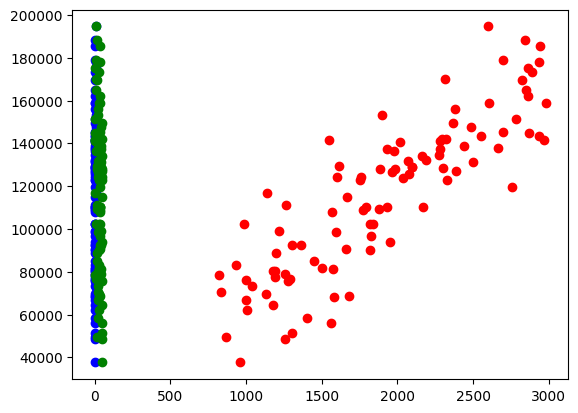

In [12]:
plt.scatter(x=data['sqft'],y=data['price'],color='red')
plt.scatter(x=data['bedrooms'],y=data['price'],color='blue')
plt.scatter(x=data['age'],y=data['price'],color='green')

In [13]:
#fearture selection
X=data[["sqft","bedrooms","age"]]
y=data["price"]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [20]:
model=Pipeline([
    ("scaler",StandardScaler()),
    ("poly",PolynomialFeatures(degree=2)),
    ("ln" ,LinearRegression())

])

In [21]:
model.fit(X_train,y_train)

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [23]:
y_predit=model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [25]:
mae=mean_absolute_error(y_test,y_predit)
mse=mean_squared_error(y_test,y_predit)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_predit)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R^2 Score:",r2)

Mean Absolute Error: 11284.15268607302
Mean Squared Error: 197902006.19491774
Root Mean Squared Error: 14067.764790289812
R^2 Score: 0.7791974271742474


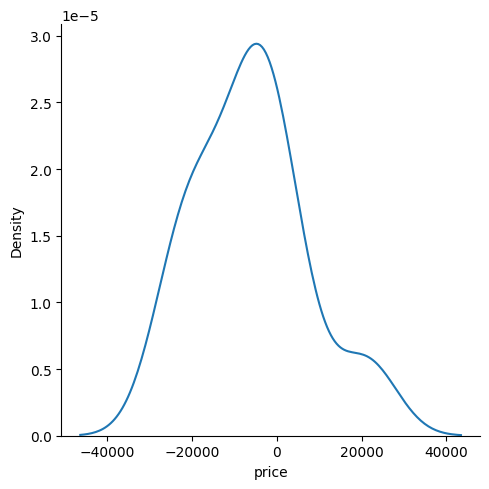

In [28]:
resudal=y_test - y_predit
sns.displot(resudal,kind="kde")

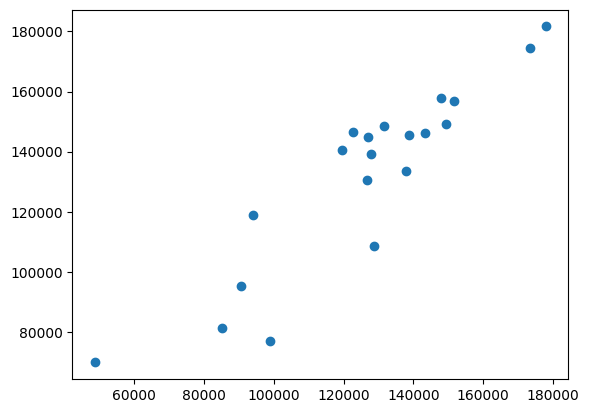

In [29]:
plt.scatter(y_test,y_predit)

In [34]:
from sklearn.model_selection import cross_val_score
validation_scores=cross_val_score(model,X_train,y_train,scoring="neg_mean_absolute_error",cv=5)
validation_scores.mean()

np.float64(-11149.678606411555)

In [44]:
new_data = pd.DataFrame([[1000, 5, 70]], columns=["sqft", "bedrooms", "age"])
prediction = model.predict(new_data)
print("Predicted Price:", prediction[0])


Predicted Price: 62377.09596744909


<Axes: xlabel='age', ylabel='price'>

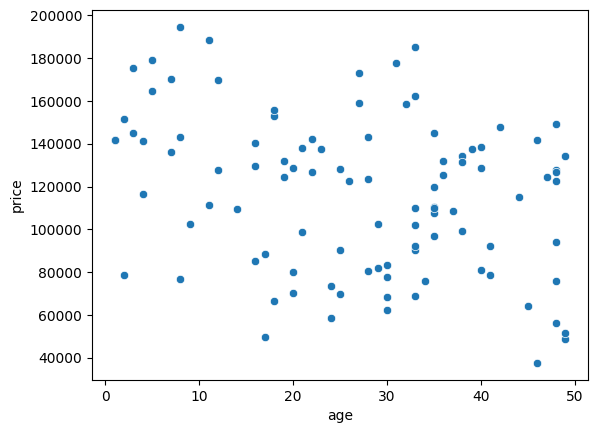

In [43]:
sns.scatterplot(x=data["age"], y=data["price"])

In [45]:
main_data=pd.read_csv("Housing.csv")

In [46]:
main_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
main_data["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)